In [1]:
import gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

import sys
import os
sys.path.append(r'/Users/chen_wt/PycharmProjects/rl_pv_mppt')
from src.agents import DiscreteActorCritic
from src.networks import DiscreteActorCriticNetwork

GAMMA = 0.99
LEARNING_RATE = 0.01
ENTROPY_BETA = 0.001
N_STEPS = 4
BATCH_SIZE = 16

CHECKPOINT_PATH = os.path.join("models", "01_cartpole_ac.tar")



env = gym.make("CartPole-v0")
test_env = gym.make("CartPole-v0")
device = torch.device("cpu")
net = DiscreteActorCriticNetwork(
    env.observation_space.shape[0], env.action_space.n
).to(device)

agent = DiscreteActorCritic(
    env=env,
    test_env=test_env,
    net=net,
    device=device,
    gamma=GAMMA,
    beta_entropy=ENTROPY_BETA,
    lr=LEARNING_RATE,
    n_steps=N_STEPS,
    batch_size=BATCH_SIZE,
    chk_path=None,
    # chk_path=CHECKPOINT_PATH,
)

In [8]:
agent.learn(1000, verbose_every=0)
# agent.plot_performance()

  0%|                                                      | 0/1000 [00:00<?, ?it/s]/Users/chen_wt/PycharmProjects/rl_pv_mppt/src/agents.py:291: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:204.)
  last_states_t = torch.tensor(last_states, dtype=torch.float32).to(self.device)
/Users/chen_wt/PycharmProjects/rl_pv_mppt/src/agents.py:355: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  actions = torch.tensor(actions, dtype=torch.int64)
100%|██████████████████████████████████████████| 1000/1000 [00:09<00:00, 109.71it/s]


In [9]:
agent.test(num_episodes=100)

200.0

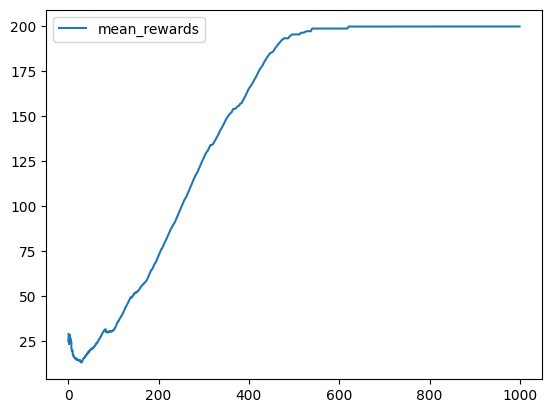

In [10]:
agent.plot_performance(['mean_rewards'])